In [8]:
# OneClassSVM -- better than EllipticEnvelope
# Can find all outliters
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.datasets import load_boston
import numpy as np
from sklearn import preprocessing

boston = load_boston()
continous_variables = [n for n in range(boston.data.shape[1]) if n != 3]
normalized_data = preprocessing.StandardScaler().fit_transform(
    boston.data[:, continous_variables]
)
# we won't visualize first 5 components
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(normalized_data)

outliers_fraction = 0.02
nu_estimate = 0.95 * outliers_fraction + 0.05
machine_learning = svm.OneClassSVM(
    kernel="rbf", gamma=1.0 / len(normalized_data), degree=3, nu=nu_estimate
)
machine_learning.fit(normalized_data)

detection = machine_learning.predict(normalized_data)

outliers = np.where(detection == -1)
regular = np.where(detection == 1)

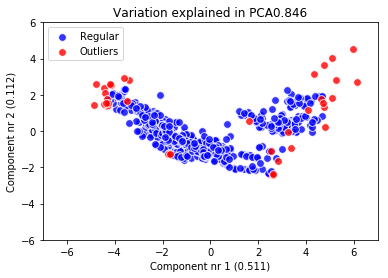

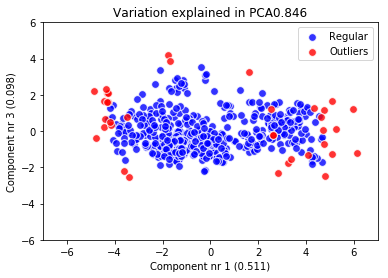

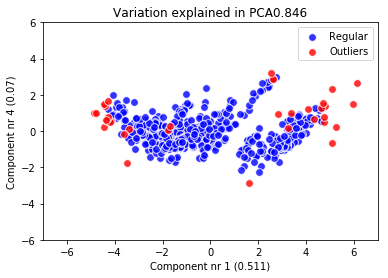

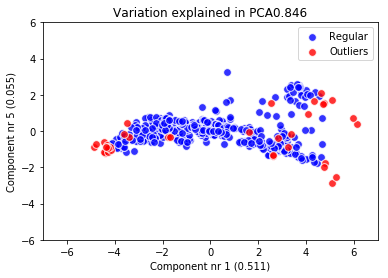

In [9]:
# vizualization
from matplotlib import pyplot as plt

vtot = "Variation explained in PCA" + str(
    round(np.sum(pca.explained_variance_ratio_), 3)
)
for r in range(1, 5):
    in_points = plt.scatter(
        Zscore_components[regular, 0],
        Zscore_components[regular, r],
        c="blue",
        alpha=0.8,
        s=60,
        marker="o",
        edgecolors="white",
    )
    out_points = plt.scatter(
        Zscore_components[outliers, 0],
        Zscore_components[outliers, r],
        c="red",
        alpha=0.8,
        s=60,
        marker="o",
        edgecolors="white",
    )
    plt.legend(
        (in_points, out_points), ("Regular", "Outliers"), scatterpoints=1, loc="best"
    )
    plt.xlabel("Component nr 1 (%s)" % str(round(pca.explained_variance_ratio_[0], 3)))
    plt.ylabel(
        "Component nr %s (%s)"
        % (r + 1, str(round(pca.explained_variance_ratio_[r], 3)))
    )
    plt.xlim([-7, 7])
    plt.ylim([-6, 6])
    plt.title(vtot)
    plt.show()